### *Данное исследование разделим на шаги:*

- ***1. Загрузка данных, изучение общей информации*** 

 - [Загрузка библиотек, файлов с данными, ознакомление, получение общей информации](#Link1)


- ***2. Анализ данных***

 - [Рейтинг топ-10 городов по количеству рейсов](#Link2)
 - [Построение графиков: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов](#Link3)
 
 
- ***3. Проверка гипотез***
 - [Проверка гипотезы: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».](#Link4)


- ***4. Общий вывод***
 - [Вывод](#Link5)

## 1. Загрузка данных, изучение общей информации

<a id='Link1'></a>

### Загрузка библиотек, файлов с данными, ознакомление, получение общей информации

In [1]:
from IPython.display import display
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
def print_df(df, df_name, title):
    """
    функция для вывода на экран датасетов
    
    параметры: DF, название DF, заголовок
    """
    
    print('\nДатасет ' + df_name + ': ' + title)
    display(df.head(5))    
    print('\nИнфо по датасету ' + df_name + ':\n')
    display(df.info())

In [3]:
# читаем файлы с данными
model_flights = pd.read_csv(r'Data\query_1.csv')
city_flights = pd.read_csv(r'Data\query_3.csv')
fest_tick_weeks = pd.read_csv(r'Data\query_last.csv')

# выводим model_flights
print_df(model_flights, 'model_flights',
        'Количество рейсов для каждой модели самолетов в сентябре 2018 года')
# выводим city_flights
print_df(city_flights, 'city_flights',
        'Cреднее количество рейсов, прибывающих в город, за день в сентябре 2018 года')
# выводим fest_tick_weeks
print_df(fest_tick_weeks, 'fest_tick_weeks',
        'Количество билетов в неделю на рейсы в Москву с 23 июля по 30 сентября 2018 '
         'с информацией о проведении фестиваля в каждую указанную неделю')


Датасет model_flights: Количество рейсов для каждой модели самолетов в сентябре 2018 года


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300



Инфо по датасету model_flights:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None


Датасет city_flights: Cреднее количество рейсов, прибывающих в город, за день в сентябре 2018 года


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613



Инфо по датасету city_flights:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None


Датасет fest_tick_weeks: Количество билетов в неделю на рейсы в Москву с 23 июля по 30 сентября 2018 с информацией о проведении фестиваля в каждую указанную неделю


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN



Инфо по датасету fest_tick_weeks:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   week_number    10 non-null     int64  
 1   ticket_amount  10 non-null     int64  
 2   festival_week  3 non-null      float64
 3   festival_name  3 non-null      object 
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


None

### Вывод:
 - *Пропуски наблюдаем* только в датасете `fest_tick_weeks`, которые говорят о том, что в указанную неделю фестивали не проводились
 - *Названия столбцов удобные*
 - В `fest_tick_weeks` *исправим тип данных у столбца `festival_week` на int*. Остальные типы данных соотвествуют данным в столбцах

## 2. Анализ данных

#### В `fest_tick_weeks` приведем столбец `festival_week` к типу данных `int`. Перед этим пропуски NAN заменим на -1.

In [4]:
# пропуски в festival_week меняем на -1
fest_tick_weeks['festival_week'] = fest_tick_weeks.festival_week.fillna(-1)
# меняем тип данных на int64
fest_tick_weeks['festival_week'] = fest_tick_weeks.festival_week.astype('int64')
# проверяем
print_df(fest_tick_weeks, 'fest_tick_weeks',
        'Количество билетов в неделю на рейсы в Москву с 23 июля по 30 сентября 2018 '
         'с информацией о проведении фестиваля в каждую указанную неделю')


Датасет fest_tick_weeks: Количество билетов в неделю на рейсы в Москву с 23 июля по 30 сентября 2018 с информацией о проведении фестиваля в каждую указанную неделю


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30,Park Live
1,31,51034,31,Пикник Афиши
2,32,51675,-1,NaN
3,33,51378,-1,NaN
4,34,51492,-1,NaN



Инфо по датасету fest_tick_weeks:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   week_number    10 non-null     int64 
 1   ticket_amount  10 non-null     int64 
 2   festival_week  10 non-null     int64 
 3   festival_name  3 non-null      object
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes


None

<a id='Link2'></a>

### Выберем топ-10 городов по количеству рейсов

In [14]:
# топ-10 городов по кол-ву рейсов
display('ТОП-10 городов по среднему количеству прибывающих рейсов в день в сентябре 2018 года:')
city_flights_top10 = city_flights.nlargest(10, 'average_flights', keep='first') 
display(city_flights_top10)

'ТОП-10 городов по среднему количеству прибывающих рейсов в день в сентябре 2018 года:'

,city,average_flights,grouped_city
43,Москва,129.774194,Москва
70,Санкт-Петербург,31.161290,Санкт-Петербург
54,Новосибирск,17.322581,Новосибирск
33,Красноярск,11.580645,Красноярск
20,Екатеринбург,11.322581,Екатеринбург
67,Ростов-на-Дону,10.193548,Ростов-на-Дону
63,Пермь,10.129032,Пермь
10,Брянск,10.000000,Брянск
74,Сочи,9.612903,Сочи
84,Ульяновск,9.580645,Ульяновск


<a id='Link3'></a>

### Построим графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов

In [6]:
def fun_ax(ax, plot, x, title, y=None,
           x_label=None, y_label=None,
           color=None):
    """ функция для рисования plt.subplots
    
    параметры:
     - subplot
     - тип графика
     - выборка для оси X
     - заголовок
     - выборка для оси Y
     - название для оси Х
     - название для оси Y
     - цвет
    """
    
    # если bar
    if plot == 'bar':
        ax.bar(x, y, color=color)
    
    # если boxplot
    elif plot == 'box':
        ax.boxplot(x, vert=False)
        
    # если pie
    elif plot == 'pie':
        # создаем массив для отделения кусков пирога
        explode = np.zeros(len(y))
        # отделяем первые 2 самых больших куска
        explode[0] = 0.1
        explode[1] = 0.1
        ax.pie(x, autopct='%.0f%%',
               textprops={'size': 'smaller'},
               explode=explode,
               # делаем по часовой стрелке
               counterclock=False)
        # выводим легенду
        ax.legend(ax.patches, y,
                  title="Города",
                  # расположение легенды
                  bbox_to_anchor=(0, 0, 0, 1))
    
    # заголовок, названия осей
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
       
    return None

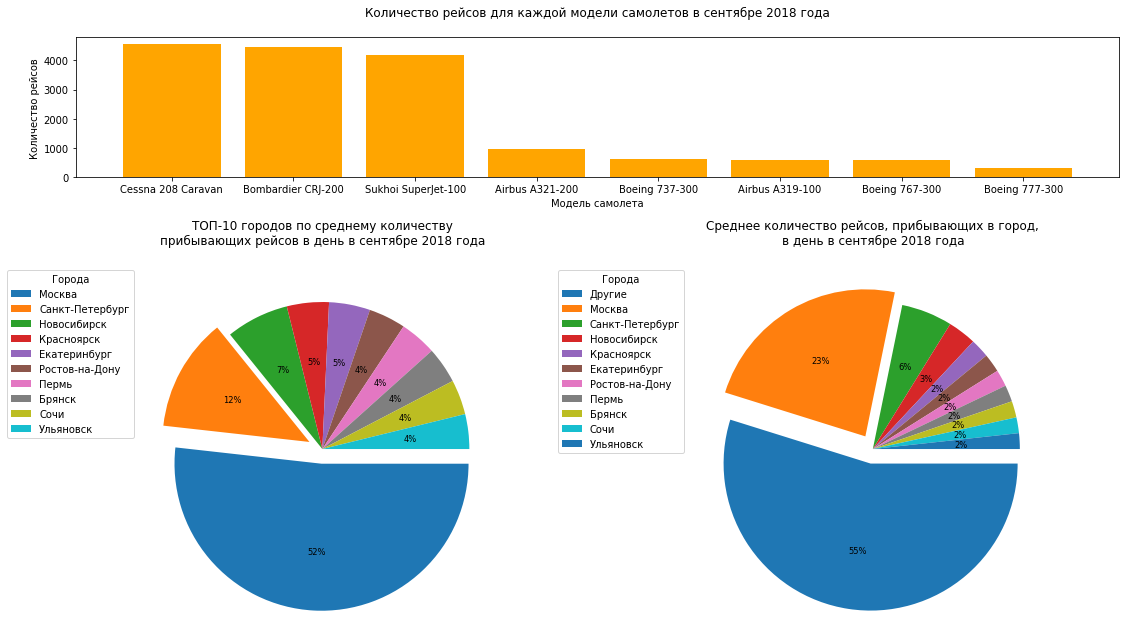

In [7]:
fig = plt.figure(figsize=(16,9))

# bar количество рейсов для каждой модели самолетов
ax = plt.subplot2grid((3,2), (0,0), colspan=2)
fun_ax(ax, 'bar',
       model_flights.sort_values('flights_amount', ascending=False).model,
       'Количество рейсов для каждой модели самолетов в сентябре 2018 года\n',
       y=model_flights.sort_values('flights_amount', ascending=False).flights_amount,
       x_label='Модель самолета',
       y_label='Количество рейсов',
       color='orange')

# города вне топ-10 относим к категории Другие
city_flights['grouped_city'] = city_flights.city.where \
                               (city_flights.index.isin(city_flights_top10.index),
                                'Другие')
# пересчитываем average_flights после введения новой категории Другие
city_flights_grouped = city_flights.groupby('grouped_city', as_index=False).sum() \
                      .sort_values('average_flights', ascending=False)

# pie все города по рейсам в день с категорией Другие
ax = plt.subplot2grid((3,2), (1,1), rowspan=2)
fun_ax(ax, 'pie',
       city_flights_grouped.average_flights,
       'Cреднее количество рейсов, прибывающих в город,\n' + 'в день в сентябре 2018 года\n',
       y=city_flights_grouped.grouped_city.values)

# pie TOP-10 городов по рейсам в день
ax = plt.subplot2grid((3,2), (1,0), rowspan=2)
fun_ax(ax, 'pie',
       city_flights_top10.average_flights,
       'ТОП-10 городов по среднему количеству\n' + 'прибывающих рейсов в день в сентябре 2018 года\n',
       y=city_flights_top10.city.values)

fig.tight_layout()

### Вывод:
 - В сентябре 2018 года пассажиры предпочитали в основном летать в Москву (23% рейсов), Санкт-Петербург (6%), Новосибирск (3%), рейсы в остальные города составляли 2% и ниже в каждый город. **Почти четверть всех рейсов авиакомпании в стране совершалась в Москву**.
 - Из ТОП-10 городов самыми популярными были Москва (52%), Санкт-Петербург (12%) и Новосибирск (7%), рейсы в остальные города составляли 5% и ниже в каждый город. **Москва в рейтинге ТОП-10 занимает первое место с более чем половиной всех рейсов из рейтинга**.
 - Полеты в основном совершались на таких моделях самолетов, как: Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100.

<a id='Link4'></a>

## 3. Проверим гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

### У нас две *независимые* выборки с небольшим объёмом каждой выборки *n < 30*

In [8]:
# выборка билеты в обычное время
tickets_usual_time = fest_tick_weeks.query('festival_week == -1')
print('Объем выборки Билеты в обычное время:', len(tickets_usual_time))
# выборка билеты во время фестивалей
tickets_fest_time = fest_tick_weeks.query('festival_week != -1')
print('Объем выборки Билеты во время фестивалей:', len(tickets_fest_time))

Объем выборки Билеты в обычное время: 7
Объем выборки Билеты во время фестивалей: 3


### Проверим наши выборки на нормальность распределения методом Шапиро-Уилка

In [9]:
# тест Шапиро-Уилка для обеих выборок

stat, p = st.shapiro(tickets_usual_time.ticket_amount.values)
print('Тест Шапиро-Уилка для выборки Билеты в обычное время:')
print('statistic=%.3f, p=%.3f' % (stat, p))

stat, p = st.shapiro(tickets_fest_time.ticket_amount.values)
print('\nТест Шапиро-Уилка для выборки Билеты во время фестивалей:')
print('statistic=%.3f, p=%.3f' % (stat, p))

Тест Шапиро-Уилка для выборки Билеты в обычное время:
statistic=0.894, p=0.296

Тест Шапиро-Уилка для выборки Билеты во время фестивалей:
statistic=0.784, p=0.076


#### Оба значения p-уровня значимости > 0.05, следовательно, мы *не можем отклонить H0* о том, что *обе наши выборки* взяты из ГС *с нормальным распределением* признака. Но так как объемы выборок очень маленькие, нужно с сомнением относиться к результату 

### Проверим выборки на наличие выбросов

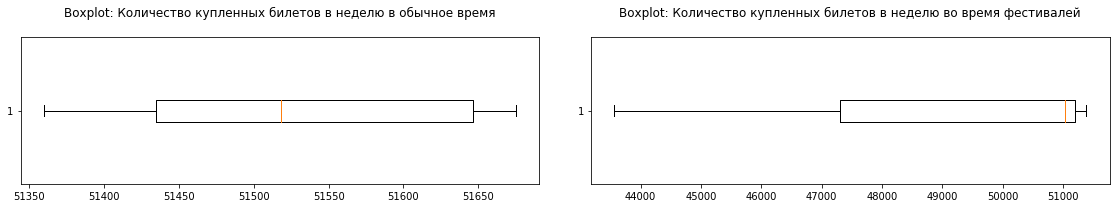

In [10]:
fig = plt.figure(figsize=(16,3))

# boxplot для выборки Билеты в обычное время
ax = plt.subplot(121)
fun_ax(ax, 'box', tickets_usual_time.ticket_amount,
       'Boxplot: Количество купленных билетов в неделю в обычное время\n')

# boxplot для выборки Билеты во время фестивалей
ax = plt.subplot(122)
fun_ax(ax, 'box', tickets_fest_time.ticket_amount,
       'Boxplot: Количество купленных билетов в неделю во время фестивалей\n')

fig.tight_layout()

#### Выбросов не наблюдаем

### Сравним дисперсии обеих выборок

In [11]:
# выводим дисперсии обеих выборок

print('Дисперсия выборки Билеты в обычное время: %.2f' % np.var(tickets_usual_time.ticket_amount, ddof=1))
print('Дисперсия выборки Билеты во время фестивалей: %.2f' % np.var(tickets_fest_time.ticket_amount, ddof=1))

Дисперсия выборки Билеты в обычное время: 17143.48
Дисперсия выборки Билеты во время фестивалей: 19497697.33


### Учитывая, что: 
 - **выборки независимые**,
 - **объем каждой выборки < 30**,
 - **мы не смогли отклонить H0 о том, что выборки пришли из ГС с нормальным распределением**,
 - **выбросов нет**,
 - **дисперсии выборок отличаются**, - 
### для проверки гипотезы о равенстве средних будем использовать параметрический t-критерий Стьюдента для независимых выборок с параметром `equal_var=False` 

**- H0: Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время (средние их ГС равны)**

**- H1: Средний спрос на билеты во время фестивалей и средний спрос на билеты в обычное время различается (средние их ГС НЕ равны)**

In [12]:
# считаем t-критерий Стьюдента для независимых выборок

stat, p = st.ttest_ind(tickets_usual_time.ticket_amount.values, tickets_fest_time.ticket_amount.values)
print('T-критерий Стьюдента для независимых выборок:')
print('statistic=%.3f, p=%.3f' % (stat, p))

T-критерий Стьюдента для независимых выборок:
statistic=1.880, p=0.097


#### p=0.097 > 0.05, следовательно, у нас недостаточно оснований отклонить нулевую гипотезу H0: средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время

### Вывод:
- Проверили наши выборки:
 - на нормальность распределения (*не смогли отклонить H0 о том, что выборки пришли из ГС с нормальным распределением*)
 - на наличие выбросов (*выбросы не обнаружили*)
 - сравнили дисперсии (*дисперсии выборок отличаются*)
- Выбрали для проверки гипотезы *t-критерий Стьюдента для независимых выборок* с параметром equal_var=False
- Сформулировали нулевую и альтернативную гипотезы
- Получили значение p-уровня значимости p=0.097 > 0.05, следовательно, **не смогли отклонить нулевую гипотезу H0: средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время**
- **Так как объемы наших выборок очень маленькие, к полученным результатам следует относиться осторожно**

<a id='Link5'></a>

## 4. Общий вывод

1. *Изучили общую информацию*


2. *Провели анализ данных*
  
  - Выбрали топ-10 городов по количеству рейсов
  
  - Построили графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов:
    - Почти четверть всех рейсов авиакомпании в стране совершалась в Москву
    - Москва в рейтинге ТОП-10 занимает первое место с более чем половиной всех рейсов из рейтинга
    - Полеты в основном совершались на таких моделях самолетов, как: Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100


3. *Проверили гипотезу «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»*
 - Проверили наши выборки:
    - на нормальность распределения (*не смогли отклонить H0 о том, что выборки пришли из ГС с нормальным распределением*)
    - на наличие выбросов (*выбросы не обнаружили*)
    - сравнили дисперсии (*дисперсии выборок отличаются*)
    
 - Выбрали для проверки гипотезы *t-критерий Стьюдента для независимых выборок* с параметром *equal_var=False*
 - Получили p=0.097 > 0.05, следовательно, **не смогли отклонить нулевую гипотезу H0: средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время**
 - **Так как объемы наших выборок очень маленькие, к полученным результатам следует относиться осторожно**